In [1]:
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import logging 
logging.basicConfig(level=logging.INFO)
def get_plot_data(pred_filepath,true_filepath, timestep):
    pred_data = np.load(pred_filepath)
    true_data = np.load(true_filepath)
    logging.info("Data shape: {}".format(pred_data.shape))
    logging.info("Data shape: {}".format(true_data.shape))
    return pred_data[timestep][0], true_data[timestep][0]

In [3]:
absolute_data_root = "/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/"
diff_data_root = "/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/diff_paper/plots/"
data_types = ["t_arr", "ux_arr", "uy_arr"]

In [4]:
thresold_dict ={
    "t_arr":0.4, 
    "ux_arr":0.024,
    "uy_arr":0.024,
}
data_type_plot_dict = {
    "t_arr": "Temperature",
    "ux_arr":"X-Velocity",
    "uy_arr":"Y-Velocity",
}

In [5]:
true_dict = {
    "ux": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_ux_arr_true.npy"),
    "uy": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_uy_arr_true.npy"),
    "t": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_t_arr_true.npy"),
}
abs_pred_dict = {
    "ux": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_ux_arr_predictions.npy"),
    "uy": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_uy_arr_predictions.npy"),
    "t": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/absolute_paper/plots/regressive_t_arr_predictions.npy"),
}

diff_pred_dict = {
    "ux": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/diff_paper/plots/regressive_ux_arr_predictions.npy"),
    "uy": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/diff_paper/plots/regressive_uy_arr_predictions.npy"),
    "t": np.load("/home/ubuntu/ml-convection/src_v2/logs/lstm_autoencoder/diff_paper/plots/regressive_t_arr_predictions.npy"),
}

In [16]:
import residual
def calculate_residual_mass(true_dict, abs_pred_dict, diff_pred_dict):
    true_ux_arr = true_dict["ux"]
    true_uy_arr = true_dict["uy"]
    true_t_arr = true_dict["t"]
    
    abs_pred_ux_matrix = abs_pred_dict["ux"]
    abs_pred_uy_matrix = abs_pred_dict["uy"]
    abs_pred_t_matrix = abs_pred_dict["t"]

    diff_pred_ux_matrix = diff_pred_dict["ux"]
    diff_pred_uy_matrix = diff_pred_dict["uy"]
    diff_pred_t_matrix = diff_pred_dict["t"]

    true_rs_arr = []
    abs_pred_rs_arr = []
    diff_pred_rs_arr = []
    for i in range(1,abs_pred_ux_matrix.shape[0]):
        abs_Rs_mass_pred = residual.residual_mass(abs_pred_ux_matrix[i][0], abs_pred_uy_matrix[i][0])
        diff_Rs_mass_pred = residual.residual_mass(diff_pred_ux_matrix[i][0], diff_pred_uy_matrix[i][0])
        Rs_mass_true = residual.residual_mass(true_ux_arr[i][0], true_uy_arr[i][0])
        true_rs_arr.append(Rs_mass_true)
        abs_pred_rs_arr.append(abs_Rs_mass_pred)
        diff_pred_rs_arr.append(diff_Rs_mass_pred)
    return np.array(true_rs_arr), np.array(abs_pred_rs_arr), np.array(diff_pred_rs_arr)

def calculate_residual_momentum(true_dict, abs_pred_dict, diff_pred_dict):
    true_ux_arr = true_dict["ux"]
    true_uy_arr = true_dict["uy"]
    true_t_arr = true_dict["t"]
    
    abs_pred_ux_matrix = abs_pred_dict["ux"]
    abs_pred_uy_matrix = abs_pred_dict["uy"]
    abs_pred_t_matrix = abs_pred_dict["t"]

    diff_pred_ux_matrix = diff_pred_dict["ux"]
    diff_pred_uy_matrix = diff_pred_dict["uy"]
    diff_pred_t_matrix = diff_pred_dict["t"]

    true_rs_arr = []
    abs_pred_rs_arr = []
    diff_pred_rs_arr = []
    for i in range(1,abs_pred_ux_matrix.shape[0]):
        abs_Rs_momentum_pred = residual.residual_momentum(abs_pred_ux_matrix[i][0], abs_pred_ux_matrix[i-1][0], abs_pred_uy_matrix[i][0], abs_pred_t_matrix[i][0])
        diff_Rs_momentum_pred = residual.residual_momentum(diff_pred_ux_matrix[i][0], diff_pred_ux_matrix[i-1][0], diff_pred_uy_matrix[i][0], diff_pred_t_matrix[i][0])
        Rs_momentum_true = residual.residual_momentum(true_ux_arr[i][0], true_ux_arr[i-1][0], true_uy_arr[i][0], true_t_arr[i][0])
        true_rs_arr.append(Rs_momentum_true)
        abs_pred_rs_arr.append(abs_Rs_momentum_pred)
        diff_pred_rs_arr.append(diff_Rs_momentum_pred)
    return np.array(true_rs_arr), np.array(abs_pred_rs_arr), np.array(diff_pred_rs_arr)
def calculate_residual_heat(true_dict, abs_pred_dict, diff_pred_dict):
    true_ux_arr = true_dict["ux"]
    true_uy_arr = true_dict["uy"]
    true_t_arr = true_dict["t"]
    
    abs_pred_ux_matrix = abs_pred_dict["ux"]
    abs_pred_uy_matrix = abs_pred_dict["uy"]
    abs_pred_t_matrix = abs_pred_dict["t"]

    diff_pred_ux_matrix = diff_pred_dict["ux"]
    diff_pred_uy_matrix = diff_pred_dict["uy"]
    diff_pred_t_matrix = diff_pred_dict["t"]

    true_rs_arr = []
    abs_pred_rs_arr = []
    diff_pred_rs_arr = []
    for i in range(1,abs_pred_ux_matrix.shape[0]):
        abs_Rs_heat_pred = residual.residual_heat(abs_pred_ux_matrix[i][0], abs_pred_uy_matrix[i][0], abs_pred_t_matrix[i][0], abs_pred_t_matrix[i-1][0])
        diff_Rs_heat_pred = residual.residual_heat(diff_pred_ux_matrix[i][0], diff_pred_uy_matrix[i][0], diff_pred_t_matrix[i][0], diff_pred_t_matrix[i-1][0])
        Rs_heat_true = residual.residual_heat(true_ux_arr[i][0], true_uy_arr[i][0], true_t_arr[i][0], true_t_arr[i-1][0])
        true_rs_arr.append(Rs_heat_true)
        abs_pred_rs_arr.append(abs_Rs_heat_pred)
        diff_pred_rs_arr.append(diff_Rs_heat_pred)
    return np.array(true_rs_arr), np.array(abs_pred_rs_arr), np.array(diff_pred_rs_arr)


Last Value True: 1.0
Last Value Absolute: 16.61580699430757
Last Value Diff: 5.681322267501508
Maximum value: 39.21947234653504


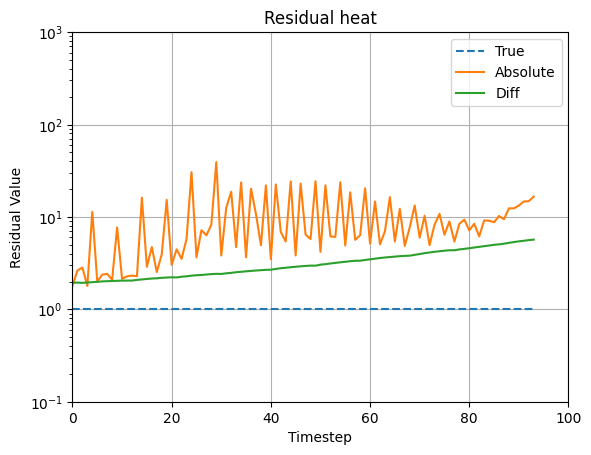

In [36]:
def plot_residual(true_rs_arr, abs_pred_rs_arr, diff_pred_rs_arr, residual_type):

    #normalize the residual values according to true_rs_arr[0] as 0 
    plt.plot(true_rs_arr, label="True", linestyle="--")
    plt.plot(abs_pred_rs_arr, label="Absolute")
    plt.plot(diff_pred_rs_arr, label="Diff")
    plt.grid(True)
    plt.xlabel("Timestep")
    plt.ylabel(f"Residual Value")
    plt.title(f"Residual {residual_type}")
    plt.yscale('log')
    plt.ylim(0.1, 1000)
    plt.xlim(0,100)
    print(f"Maximum value: {max(max(abs_pred_rs_arr), max(diff_pred_rs_arr))}")
    plt.legend()
    plt.show()

def calculate_residual(true_dict, abs_pred_dit, diff_pred_dict, residual_type):
    residual_type_function_dict  = {
        "mass": calculate_residual_mass,
        "momentum": calculate_residual_momentum,
        "heat": calculate_residual_heat,
    }
    true_rs_arr, abs_pred_rs_arr, diff_pred_rs_arr = residual_type_function_dict[residual_type](true_dict, abs_pred_dit, diff_pred_dict)
    # normalize the residual values such that true_rs_arr is always 1. 
    # so dividing each residual value by true_rs_arr[i]
    abs_pred_rs_arr = abs_pred_rs_arr / true_rs_arr
    diff_pred_rs_arr = diff_pred_rs_arr / true_rs_arr
    true_rs_arr = true_rs_arr / true_rs_arr

    print(f"Last Value True: {true_rs_arr[-1]}")
    print(f"Last Value Absolute: {abs_pred_rs_arr[-1]}")
    print(f"Last Value Diff: {diff_pred_rs_arr[-1]}")
    plot_residual(true_rs_arr, abs_pred_rs_arr, diff_pred_rs_arr, residual_type)

calculate_residual(true_dict, abs_pred_dict, diff_pred_dict, "heat")